In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  1 07:36:29 2020

@author: moritzgerster
"""
import os
import mne
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('TkAgg')
#matplotlib qt
%matplotlib tk

In [2]:
# %%
# =============================================================================
# Create MNE Info
# =============================================================================
ch_names = ['SMA', 'leftM1', 'rightM1',
            'STN_R01', 'STN_R12', 'STN_R23',
            'STN_L01', 'STN_L12', 'STN_L23',
            'EMG_R', 'EMG_L',
            'HEOG', 'VEOG',
            'event']
sfreq = 2400
ch_types = ["mag", "mag", "mag",
            "seeg", "seeg", "seeg", "seeg", "seeg", "seeg",
            "emg", "emg",
            "eog", "eog",
            "stim"]

info = mne.create_info(ch_names, sfreq, ch_types, verbose=True)

In [101]:
# %%
# =============================================================================
# LOAD SUBJECTS
# =============================================================================
n_sub = 0
path = '../../data/raw/rest/subj'

cond = "on"
raw_on = []

for subj in range(n_sub):
    path_subj = path + f'{subj+1}/{cond}/'  # subjects start at 1
    fname = os.listdir(path_subj)[0]  # load first file only
    if fname == ".DS_Store":
        fname = os.listdir(path_subj)[1]
    data_subj = mne.io.read_raw_fieldtrip(path_subj + fname,
                                          info, data_name='data')
    raw_on.append(data_subj)

Creating RawArray with float64 data, n_channels=14, n_times=456000
    Range : 0 ... 455999 =      0.000 ...   190.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=456000
    Range : 0 ... 455999 =      0.000 ...   190.000 secs
Ready.


In [102]:
cond = "off"
raw_off = []

for subj in range(n_sub):
    path_subj = path + f'{subj+1}/{cond}/'  # subjects start at 1
    fname = os.listdir(path_subj)[0]  # load first file only
    data_subj = mne.io.read_raw_fieldtrip(path_subj + fname,
                                          info, data_name='data')
    raw_off.append(data_subj)

Creating RawArray with float64 data, n_channels=14, n_times=456000
    Range : 0 ... 455999 =      0.000 ...   190.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=444000
    Range : 0 ... 443999 =      0.000 ...   185.000 secs
Ready.


# Check Raw data of all channels for each subject entire recording

In [9]:
#          [(low_f, high_f, f_range, n_ch)]
filtered = [(None, None, "Raw", 20)]
subj = 0

for filt in filtered:
    
    fig = raw_off[subj].plot(title=f"Subj: {subj+1} Off " + filt[2],
                duration=190,
                n_channels=filt[3],
                scalings=dict(mag=400, seeg=12, eog=100, emg=500, stim=1),
                color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                highpass=filt[0], lowpass=filt[1],
                group_by="original")

    fig = raw_on[subj].plot(title=f"Subj: {subj+1} On " + filt[2],
                    duration=190,
                    n_channels=filt[3],
                    scalings=dict(mag=400, seeg=12, eog=100, emg=500, stim=1),
                    color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                    highpass=filt[0], lowpass=filt[1],
                    group_by="original")
        

  #  break

# Store the annotations

In [29]:
bads = raw_on[subj].annotations.copy()

# Save as list

In [98]:
# print segements:
s_rate = 2400
reject_times = [(b["onset"], b["onset"] + b["duration"]) for b in bads]
reject_indices = [(np.int(b["onset"]*s_rate), np.int((b["onset"] + b["duration"])*s_rate)) for b in bads]

print(reject_times)
print(reject_indices)

[(15.950760296010298, 18.020172136422136), (35.99055662805663, 36.878550514800516), (43.181494208494215, 45.70648552123553), (83.58155019305019, 83.84408751608751), (102.03435842985843, 103.07678603603604), (139.10027734877735, 141.03842052767055), (141.94957947232948, 143.10783236808237), (144.67350836550838, 146.00936003861005), (156.0125958815959, 164.05859266409269), (185.94611486486485, 189.72974099099096)]
[(38281, 43248), (86377, 88508), (103635, 109695), (200595, 201225), (244882, 247384), (333840, 338492), (340678, 343458), (347216, 350422), (374430, 393740), (446270, 455351)]


# Plot with and without bad segments:

Effective window size : 0.853 (s)
Effective window size : 0.853 (s)
Setting 55318 of 456000 (12.13%) samples to NaN, retaining 400682 (87.87%) samples.
Effective window size : 0.853 (s)
Setting 55318 of 456000 (12.13%) samples to NaN, retaining 400682 (87.87%) samples.
Effective window size : 0.853 (s)


<ipython-input-48-712dc2bebcd0>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_on[subj].plot_psd(fmax=600, reject_by_annotation=False)
<ipython-input-48-712dc2bebcd0>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_on[subj].plot_psd(fmax=600, reject_by_annotation=True)
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    se

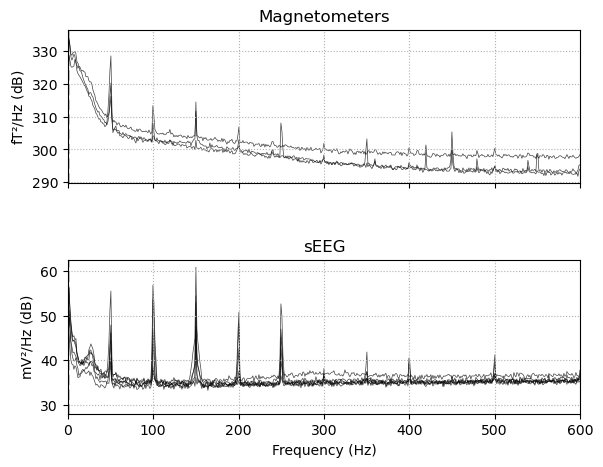

In [48]:
raw_on[subj].plot_psd(fmax=600, reject_by_annotation=False)
raw_on[subj].plot_psd(fmax=600, reject_by_annotation=True)

# Save as numpy with annotations

In [50]:
raw_on[subj].save('subj0_raw_on.fif')

Writing /Users/moritzgerster/Documents/Code/Litvak11/code/Jupyter_Notebooks/subj0_raw_on.fif
Closing /Users/moritzgerster/Documents/Code/Litvak11/code/Jupyter_Notebooks/subj0_raw_on.fif
[done]


<ipython-input-50-14f0b82c113e>:1: RuntimeWarning: This filename (/Users/moritzgerster/Documents/Code/Litvak11/code/Jupyter_Notebooks/subj0_raw_on.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_on[subj].save('subj0_raw_on.fif')


In [85]:
bads[0]["onset"]

15.950760296010298

In [53]:
df = raw_on[subj].to_data_frame()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456000 entries, 0 to 455999
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time     456000 non-null  int64  
 1   SMA      456000 non-null  float64
 2   leftM1   456000 non-null  float64
 3   rightM1  456000 non-null  float64
 4   STN_R01  456000 non-null  float64
 5   STN_R12  456000 non-null  float64
 6   STN_R23  456000 non-null  float64
 7   STN_L01  456000 non-null  float64
 8   STN_L12  456000 non-null  float64
 9   STN_L23  456000 non-null  float64
 10  EMG_R    456000 non-null  float64
 11  EMG_L    456000 non-null  float64
 12  HEOG     456000 non-null  float64
 13  VEOG     456000 non-null  float64
 14  event    456000 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 52.2 MB


In [55]:
df_SMA = df["SMA"]

In [60]:
import numpy as np
SMA_npy = np.array(df_SMA)

In [61]:
SMA_npy

array([-8.48410492e+16, -9.48888779e+16, -1.25271561e+17, ...,
        8.19193344e+16,  7.73924484e+16,  7.28402863e+16])

In [104]:
filtered = [(None, None, "Raw", 20)]
subj = 1

for filt in filtered:
    
    fig = raw_off[subj].plot(title=f"Subj: {subj+1} Off " + filt[2],
                duration=10,
                n_channels=filt[3],
                scalings=dict(mag=400, seeg=12, eog=100, emg=500, stim=1),
                color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                highpass=filt[0], lowpass=filt[1],
                group_by="original")

In [107]:
filtered = [(None, None, "Raw", 20)]
subj = 1

for filt in filtered:
    
    fig = raw_on[subj].plot(title=f"Subj: {subj+1} On " + filt[2],
                duration=10,
                n_channels=filt[3],
                scalings=dict(mag=400, seeg=12, eog=100, emg=500, stim=1),
                color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                highpass=filt[0], lowpass=filt[1],
                group_by="original")

In [99]:
filtered = [(12, 30, "beta", 9), (1, 4, "delta", 9), (0.01, 1, "low artefact 0-1Hz", 9)]
subj = 0

for filt in filtered:
    fig = raw_off[subj].plot(title=f"Subj: {subj+1} Off " + filt[2],
                    duration=190,
                    n_channels=filt[3],
                    scalings=dict(mag=400, seeg=8),#, eog=100, emg=500, stim=1),
                    color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                    highpass=filt[0], lowpass=filt[1],
                    group_by="original")


Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/mne/viz/utils.py", line 802, in _resize_event
    _update_borders(params, new_width, new_height)
  File "/opt/anaconda3/lib/python3.8/site-packages/mne/viz/utils.py", line 608, in _update_borders
    params['zen_w_delta'] *= old_width / new_width
KeyError: 'zen_w_delta'


Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 0.01 - 1 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.01, 1.00 Hz: -6.02, -6.02 dB



# Check Frequency Band filtered Raw data of Brain channels for each subject entire recording

In [6]:
filtered = [(12, 30, "beta", 9), (1, 4, "delta", 9), (0.01, 1, "low artefact 0-1Hz", 9)]
subj = 7

for filt in filtered:
    fig = raw_off[subj].plot(title=f"Subj: {subj+1} Off " + filt[2],
                    duration=190,
                    n_channels=filt[3],
                    scalings=dict(mag=400, seeg=8),#, eog=100, emg=500, stim=1),
                    color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                    highpass=filt[0], lowpass=filt[1],
                    group_by="original")

    fig = raw_on[subj].plot(title=f"Subj: {subj+1} On " + filt[2],
                duration=190,
                n_channels=filt[3],
                scalings=dict(mag=400, seeg=8),#, eog=100, emg=500, stim=1),
                color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                highpass=filt[0], lowpass=filt[1],
                group_by="original")


IndexError: list index out of range

# Check Raw data of all channels for each subject 1 second

In [10]:
#          [(low_f, high_f, f_range, n_ch)]
filtered = [(None, None, "Raw", 20)]
subj = 1

for filt in filtered:
    
    fig = raw_off[subj].plot(title=f"Subj: {subj+1} Off " + filt[2],
                duration=1,
                n_channels=filt[3],
                scalings=dict(mag=400, seeg=12, eog=100, emg=500, stim=1),
                color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                highpass=filt[0], lowpass=filt[1],
                group_by="original")

    fig = raw_on[subj].plot(title=f"Subj: {subj+1} On " + filt[2],
                    duration=1,
                    n_channels=filt[3],
                    scalings=dict(mag=400, seeg=12, eog=100, emg=500, stim=1),
                    color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                    highpass=filt[0], lowpass=filt[1],
                    group_by="original")
        

  #  break

# Check Frequency Band filtered Raw data of Brain channels for each subject entire recording

In [11]:
filtered = [(12, 30, "beta", 9), (1, 4, "delta", 9), (0.01, 1, "low artefact 0-1Hz", 9)]
subj = 8

for filt in filtered:
    fig = raw_off[subj].plot(title=f"Subj: {subj+1} Off " + filt[2],
                    duration=1,
                    n_channels=filt[3],
                    scalings=dict(mag=400, seeg=8),#, eog=100, emg=500, stim=1),
                    color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                    highpass=filt[0], lowpass=filt[1],
                    group_by="original")

    fig = raw_on[subj].plot(title=f"Subj: {subj+1} On " + filt[2],
                duration=1,
                n_channels=filt[3],
                scalings=dict(mag=400, seeg=8),#, eog=100, emg=500, stim=1),
                color = dict(mag='darkblue', seeg='black', eog='grey', emg='brown',stim='k'),
                highpass=filt[0], lowpass=filt[1],
                group_by="original")


Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (

# Gabriel: What is the smallest step between amplitudes? The bit rate?

In [5]:
import scipy.signal
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
#################
# read the data #
#################
f_on_data = '../../data/raw/rest/subj1/on/subj1_on_R7.mat'
f_off_data = '../../data/raw/rest/subj1/off/subj1_off_R7.mat'

on_data = scipy.io.loadmat(f_on_data)['data'][0,0][1][0,0]
on_labels = [i[0][0] for i in scipy.io.loadmat(f_on_data)['data'][0,0][0]]
on_t = scipy.io.loadmat(f_on_data)['data'][0,0][2][0,0][0]

off_data = scipy.io.loadmat(f_off_data)['data'][0,0][1][0,0]
off_labels = [i[0][0] for i in scipy.io.loadmat(f_off_data)['data'][0,0][0]]
off_t = scipy.io.loadmat(f_off_data)['data'][0,0][2][0,0][0]

if np.allclose(np.diff(on_t), np.diff(on_t)[0]):
    on_d = np.diff(on_t)[0]
    on_s_rate = 1./on_d
else:
    raise ValueError('Signal must be evenly sampled')

if np.allclose(np.diff(off_t), np.diff(off_t)[0]):
    off_d = np.diff(off_t)[0]
    off_s_rate = 1./off_d
else:
    raise ValueError('Signal must be evenly sampled')

if not on_labels == off_labels:
    raise ValueError('channel labels must be equal during on and off')

In [60]:
on_diff = abs(np.diff(on_data))
off_diff = abs(np.diff(off_data))

on_min = np.min(on_diff[on_diff>0])
off_min = np.min(off_diff[off_diff>0])

print(f"Smallest step: {min(on_min, off_min):.1e}")
print(f"Mean: {np.mean([np.mean(on_data), np.mean(off_data)]):.1f}")
print(f"Standard Deviation: {np.mean([np.std(on_data), np.std(off_data)]):.1f}")
print(f"Range: {min([np.min(on_data), np.min(off_data)]):.1f} - {max([np.max(on_data), np.max(off_data)]):.1f}")

Smallest step: 1.8e-07
Mean: -0.1
Standard Deviation: 54.9
Range: -3272.9 - 2772.1


# Data attributes for all pats and all conds:
### Smallest step: $1.8 \cdot 10^{-7}$
### Mean: $-0.1$
### Standard Deviation: $54.9$
### Range: $-3272.9$ to $2772.1$